In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

**This is the whole dataFrame including new and old education system**

In [2]:
thanawya = pd.read_excel("Thanawya.xlsx")

In [3]:
thanawya.head()

,seating_no,arabic_name,total_degree
0,1001660,محمد ابو الحسن حسن مصطفى,163.5
1,1001661,محمد احمد محمد ابو زيد,187.5
2,1001662,محمد على محمود عبدالعزيز,168.0
3,1001663,محمود سيد انور محمد حامد,212.0
4,1001664,محمود عطيه محمود جابر حجاج,154.0


**seperating new education system from old ecucation system**

In [ ]:
newThanawya  = thanawya[(thanawya['total_degree'] <= 319) & (thanawya['total_degree'] > 0)]

In [ ]:
Average_grades = newThanawya['total_degree'].mean()
Average_degree = newThanawya['degree_percent'].mean()

68.32921109829638

**Total absences from old and new education systems**

In [71]:
absences = thanawya[thanawya['total_degree'] == 0]
absences_num = absences['total_degree'].count()
absences_num

27665

In [61]:
newThanawya.head()

,seating_no,arabic_name,total_degree,degree_percent,over_all
0,1001660,محمد ابو الحسن حسن مصطفى,163.5,51.09375,Very Weak
1,1001661,محمد احمد محمد ابو زيد,187.5,58.59375,Very Weak
2,1001662,محمد على محمود عبدالعزيز,168.0,52.50000,Very Weak
3,1001663,محمود سيد انور محمد حامد,212.0,66.25000,Weak
4,1001664,محمود عطيه محمود جابر حجاج,154.0,48.12500,Failed


**adding new columns of the percentage**

In [62]:
newThanawya['degree_percent'] = (newThanawya['total_degree']/320) * 100

C:\Users\youssef\AppData\Local\Temp\ipykernel_17596\2645868404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newThanawya['degree_percent'] = (newThanawya['total_degree']/320) * 100


**Categories of the grades** 

In [63]:
labels = ["Failed","Very Weak","Weak","Good","Very Good", "Excellent"]
bins = [0, 50, 60, 70, 80, 90, 100]
newThanawya['over_all'] = pd.cut(newThanawya['degree_percent'], labels= labels, bins= bins)

C:\Users\youssef\AppData\Local\Temp\ipykernel_17596\3237467641.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newThanawya['over_all'] = pd.cut(newThanawya['degree_percent'], labels= labels, bins= bins)


In [64]:
q1 = newThanawya['total_degree'].quantile(0.25)
q3 = newThanawya['total_degree'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
lower_bound
newThanawya = newThanawya[(newThanawya['total_degree'] < upper_bound) & (newThanawya['total_degree'] > lower_bound)]

In [77]:
newThanawya['over_all'].value_counts()

over_all
Weak         188277
Good         166423
Very Good    139627
Very Weak    135842
Failed        91996
Excellent     53418
Name: count, dtype: int64

**Visualization and graphs** 

In [65]:
sns.set_style("darkgrid")
sns.set_theme("notebook")

**count of the evaluation**

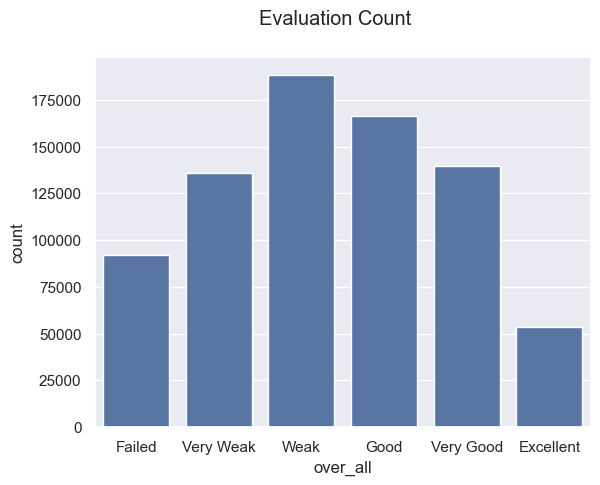

In [66]:
sns.countplot(data= newThanawya, x= 'over_all').figure.suptitle("Evaluation Count")
plt.show()

**Distribution of the degrees**

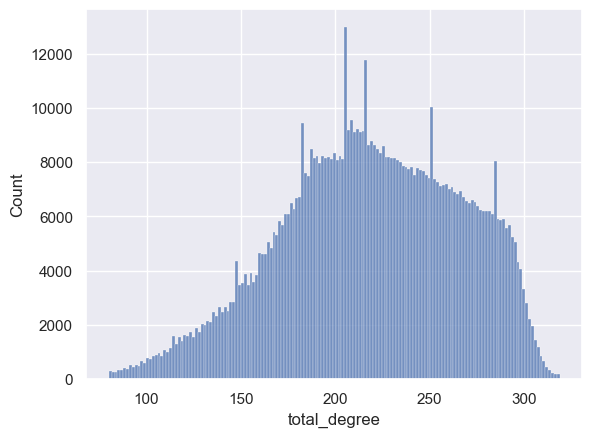

In [72]:
sns.histplot(data= newThanawya, x= 'total_degree')
plt.show()